In [6]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mse
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(xTrain, yTrain), (xVal, yVal) = mnist.load_data()
xTrain, xVal = xTrain.reshape(60000,784)/255., xVal.reshape(10000,784)/255.

In [8]:
inputL = Input(shape=(784,))
x = Dense(512, activation='relu')(inputL)
x = Dense(64, activation='relu')(x)
z = Dense(2, activation='relu')(x)
encoder = Model(inputL, z)
encoder.summary(); print("\n\n")

dInputL = Input(shape=(2,))
x = Dense(64, activation='relu')(dInputL)
x = Dense(512, activation='relu')(x)
outputL = Dense(784)(x)
decoder = Model(dInputL, outputL)
decoder.summary(); print("\n\n")

outputL = decoder(z) # decoder model connect to z. View whole decoder as a layer called outputL
autoencoder = Model(inputL, outputL, name="AE")
autoencoder.summary()
autoencoder.compile(optimizer=Adam(lr=0.0001), loss='mse')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 434,882
Trainable params: 434,882
Non-trainable params: 0
_________________________________________________________________



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________

In [9]:
history = autoencoder.fit(xTrain, xTrain, epochs=50, batch_size=128, \
    validation_data=(xVal, xVal))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0692 - val_loss: 0.0634
Epoch 2/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0632 - val_loss: 0.0630
Epoch 3/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.0622 - val_loss: 0.0611
Epoch 4/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.0606 - val_loss: 0.0586
Epoch 5/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.0546 - val_loss: 0.0525
Epoch 6/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.0519 - val_loss: 0.0506
Epoch 7/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0502 - val_loss: 0.0490
Epoch 8/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.0489 - val_loss: 0.0480
Epoch 9/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0479 - val_loss: 0.047

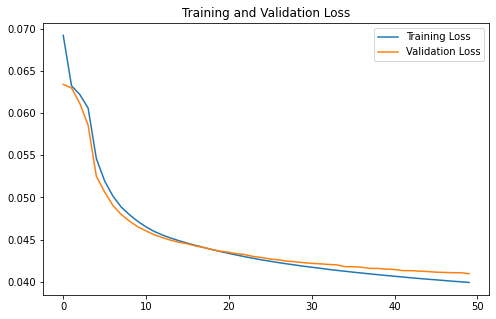

In [10]:
loss, val_loss = history.history['loss'], history.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

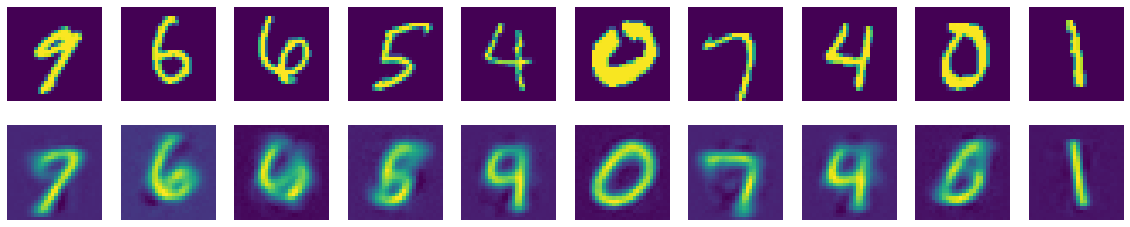

In [16]:
start = 20
pred = autoencoder.predict( xVal[start:start+10] )
pred = pred.reshape(10,28,28)

plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(xVal[start+i].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(2, 10, 10+i+1)
    plt.imshow(pred[i])
    plt.axis('off')
plt.show()

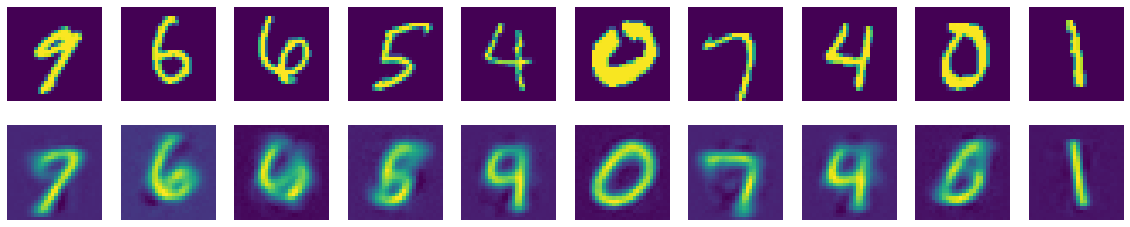

[1.7697697 2.3051755] [4.944491 8.009487] [3.3981636 8.505678 ] [5.455506  6.2119026] [1.7328802 5.5841813] [ 6.267788 22.612751] [0.        3.7192051] [2.2375455 5.805871 ] [ 9.554851 11.010366] [0.2935021  0.22799934] 

In [17]:
code = encoder.predict( xVal[start:start+10] )
recover = decoder.predict( code )
recover = recover.reshape(10,28,28)

plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(xVal[start+i].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(2, 10, 10+i+1)
    plt.imshow(recover[i])
    plt.axis('off')
plt.show()

for c in code:
    print(c, end=" ")